In [35]:
"""
Exploratory data analysis (EDA) script to load, explore, and visualize correlated_outage dataset 
Description:  
This script loads a dataset from file, displays summary statistics, and generates basic visualizations  
to support exploratory data analysis (EDA).  
Author: Hollis Belnap  
Date Created: April 15, 2025  
"""

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import geopandas as gpd
import plotly.express as px

px.set_mapbox_access_token("pk.eyJ1IjoiaG9sbGlzYmVsbmFwIiwiYSI6ImNsdW16a2dlejFnbmwyanAxdGZweTY5b2oifQ.WwbVpyOPQZt4gHWj4kekAQ")

In [ ]:
# Set path to your dataset folder
data_dir = r"data_collection_by_hollis/correlated_outage"

In [5]:
# List all files in the directory
files = os.listdir(data_dir)
print("Files found:")
for f in files:
    print("-", f)


Files found:
- eaglei_outages_2014_agg.csv
- eaglei_outages_2014_merged.csv
- eaglei_outages_2015_agg.csv
- eaglei_outages_2015_merged.csv
- eaglei_outages_2016_agg.csv
- eaglei_outages_2016_merged.csv
- eaglei_outages_2017_agg.csv
- eaglei_outages_2017_merged.csv
- eaglei_outages_2018_agg.csv
- eaglei_outages_2018_merged.csv
- eaglei_outages_2019_agg.csv
- eaglei_outages_2019_merged.csv
- eaglei_outages_2020_agg.csv
- eaglei_outages_2020_merged.csv
- eaglei_outages_2021_agg.csv
- eaglei_outages_2021_merged.csv
- eaglei_outages_2022_agg.csv
- eaglei_outages_2022_merged.csv
- eaglei_outages_2023_agg.csv
- eaglei_outages_2023_merged.csv
- eaglei_outages_with_events_2014.csv
- eaglei_outages_with_events_2015.csv
- eaglei_outages_with_events_2016.csv
- eaglei_outages_with_events_2017.csv
- eaglei_outages_with_events_2018.csv
- eaglei_outages_with_events_2019.csv
- eaglei_outages_with_events_2020.csv
- eaglei_outages_with_events_2021.csv
- eaglei_outages_with_events_2022.csv
- eaglei_outage

In [6]:

# Loop through and try to load each file
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    print(f"\n=== Now exploring: {file_name} ===")

    try:
        # Try CSV
        if file_name.endswith(".csv"):
            df = pd.read_csv(file_path)
        # Try Excel
        elif file_name.endswith((".xlsx", ".xls")):
            df = pd.read_excel(file_path)
        # Try Pickle
        elif file_name.endswith(".pkl") or file_name.endswith(".pickle"):
            df = pd.read_pickle(file_path)
        # Try JSON
        elif file_name.endswith(".json"):
            df = pd.read_json(file_path)
        else:
            print("  ⚠️  Unsupported file format. Skipping.")
            continue

        # Show basic info
        print(f"  Shape: {df.shape}")
        print("  Columns:", df.columns.tolist())
        print("  Preview:")
        display(df.head())

    except Exception as e:
        print(f"  ❌ Failed to load {file_name}: {e}")


=== Now exploring: eaglei_outages_2014_agg.csv ===
  Shape: (598, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2014,0,33,26.5,51208.25
1,Alabama,2014,1,0,0.0,0.00
2,Alabama,2014,2,0,0.0,0.00
3,Alabama,2014,3,0,0.0,0.00
4,Alabama,2014,4,0,0.0,0.00



=== Now exploring: eaglei_outages_2014_merged.csv ===
  Shape: (13516, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2014-12-24 13:45:00,1.00,640,643,641.000
1,1003,Alabama,Baldwin,2014-11-03 12:30:00,0.75,348,348,348.000
2,1003,Alabama,Baldwin,2014-11-16 10:30:00,2.00,300,461,320.125
3,1003,Alabama,Baldwin,2014-11-18 18:45:00,1.25,296,297,296.400
4,1003,Alabama,Baldwin,2014-11-19 18:30:00,0.25,297,297,297.000



=== Now exploring: eaglei_outages_2015_agg.csv ===
  Shape: (637, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2015,0,338,25.00,424475.00
1,Alabama,2015,1,15,3.00,15911.75
2,Alabama,2015,2,12,6.25,10030.00
3,Alabama,2015,3,19,25.00,37367.50
4,Alabama,2015,4,13,5.00,11394.75



=== Now exploring: eaglei_outages_2015_merged.csv ===
  Shape: (115962, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2015-02-06 19:30:00,0.25,381,381,381.000000
1,1001,Alabama,Autauga,2015-03-19 15:00:00,0.25,1468,1468,1468.000000
2,1001,Alabama,Autauga,2015-03-25 12:30:00,2.25,210,849,777.222222
3,1001,Alabama,Autauga,2015-03-25 15:00:00,3.50,848,864,851.000000
4,1001,Alabama,Autauga,2015-03-26 12:30:00,0.25,706,706,706.000000



=== Now exploring: eaglei_outages_2016_agg.csv ===
  Shape: (637, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2016,0,483,19.25,688968.50
1,Alabama,2016,1,29,5.00,37846.50
2,Alabama,2016,2,39,9.25,42887.25
3,Alabama,2016,3,36,3.75,28500.25
4,Alabama,2016,4,29,5.25,24708.25



=== Now exploring: eaglei_outages_2016_merged.csv ===
  Shape: (116438, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2016-01-23 10:30:00,2.00,381,382,381.500
1,1001,Alabama,Autauga,2016-02-15 23:45:00,2.00,270,1583,983.875
2,1001,Alabama,Autauga,2016-02-24 04:15:00,0.25,201,201,201.000
3,1001,Alabama,Autauga,2016-03-04 20:30:00,0.25,264,264,264.000
4,1001,Alabama,Autauga,2016-03-15 13:45:00,2.50,845,845,845.000



=== Now exploring: eaglei_outages_2017_agg.csv ===
  Shape: (663, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2017,0,1289,69.00,3727812.25
1,Alabama,2017,1,60,7.75,98184.00
2,Alabama,2017,2,21,4.50,30020.50
3,Alabama,2017,3,49,3.50,40264.75
4,Alabama,2017,4,62,10.75,75301.00



=== Now exploring: eaglei_outages_2017_merged.csv ===
  Shape: (118929, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2017-01-21 14:45:00,3.00,237.0,403.0,332.250000
1,1001,Alabama,Autauga,2017-01-22 19:15:00,0.25,259.0,259.0,259.000000
2,1001,Alabama,Autauga,2017-01-22 20:00:00,3.50,213.0,1175.0,387.357143
3,1001,Alabama,Autauga,2017-01-23 02:00:00,0.25,269.0,269.0,269.000000
4,1001,Alabama,Autauga,2017-01-23 03:15:00,0.25,254.0,254.0,254.000000



=== Now exploring: eaglei_outages_2018_agg.csv ===
  Shape: (663, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2018,0,4361,161.25,10377495.25
1,Alabama,2018,1,219,9.75,178703.50
2,Alabama,2018,2,97,101.00,137461.25
3,Alabama,2018,3,299,68.00,530617.00
4,Alabama,2018,4,367,22.25,565984.50



=== Now exploring: eaglei_outages_2018_merged.csv ===
  Shape: (153442, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2018-01-12 09:45:00,4.75,248.0,651.0,454.894737
1,1001,Alabama,Autauga,2018-01-20 04:00:00,1.25,1026.0,1027.0,1026.200000
2,1001,Alabama,Autauga,2018-01-20 05:30:00,0.25,1087.0,1087.0,1087.000000
3,1001,Alabama,Autauga,2018-01-20 06:00:00,1.00,218.0,880.0,573.750000
4,1001,Alabama,Autauga,2018-01-22 14:30:00,0.25,456.0,456.0,456.000000



=== Now exploring: eaglei_outages_2019_agg.csv ===
  Shape: (676, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2019,0,4387,50.25,5979976.50
1,Alabama,2019,1,291,26.50,282576.75
2,Alabama,2019,2,266,15.50,342960.25
3,Alabama,2019,3,268,32.75,455302.75
4,Alabama,2019,4,475,50.25,1005920.00



=== Now exploring: eaglei_outages_2019_merged.csv ===
  Shape: (157478, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2019-01-15 15:00:00,0.25,1369.0,1369.0,1369.0
1,1001,Alabama,Autauga,2019-01-29 20:30:00,0.25,610.0,610.0,610.0
2,1001,Alabama,Autauga,2019-01-31 20:15:00,0.25,2100.0,2100.0,2100.0
3,1001,Alabama,Autauga,2019-02-12 16:45:00,1.25,216.0,228.0,223.8
4,1001,Alabama,Autauga,2019-02-12 18:45:00,0.50,205.0,205.0,205.0



=== Now exploring: eaglei_outages_2020_agg.csv ===
  Shape: (676, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2020,0,4825,269.00,54097905.75
1,Alabama,2020,1,407,47.25,1701510.75
2,Alabama,2020,2,281,16.75,279854.75
3,Alabama,2020,3,316,123.75,398857.00
4,Alabama,2020,4,539,88.25,4897693.25



=== Now exploring: eaglei_outages_2020_merged.csv ===
  Shape: (166183, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2020-01-11 20:15:00,20.00,203.0,1381.0,468.7875
1,1001,Alabama,Autauga,2020-01-12 17:45:00,0.25,232.0,232.0,232.0000
2,1001,Alabama,Autauga,2020-01-12 18:15:00,0.75,205.0,205.0,205.0000
3,1001,Alabama,Autauga,2020-01-12 19:45:00,0.25,205.0,205.0,205.0000
4,1001,Alabama,Autauga,2020-01-13 13:30:00,0.75,306.0,306.0,306.0000



=== Now exploring: eaglei_outages_2021_agg.csv ===
  Shape: (689, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2021,0,4251,89.50,9246043.25
1,Alabama,2021,1,226,38.00,347257.25
2,Alabama,2021,2,262,51.25,800083.50
3,Alabama,2021,3,413,66.50,1628175.25
4,Alabama,2021,4,339,34.75,800699.25



=== Now exploring: eaglei_outages_2021_merged.csv ===
  Shape: (174936, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2021-01-06 20:45:00,0.25,231.0,231.0,231.0
1,1001,Alabama,Autauga,2021-01-22 03:45:00,1.00,789.0,789.0,789.0
2,1001,Alabama,Autauga,2021-01-27 15:15:00,0.25,288.0,288.0,288.0
3,1001,Alabama,Autauga,2021-03-02 18:15:00,1.25,757.0,758.0,757.8
4,1001,Alabama,Autauga,2021-03-05 00:15:00,1.00,564.0,564.0,564.0



=== Now exploring: eaglei_outages_2022_agg.csv ===
  Shape: (689, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2022,0,4321,51.50,7500418.75
1,Alabama,2022,1,297,20.50,475069.25
2,Alabama,2022,2,252,27.00,363967.25
3,Alabama,2022,3,398,36.75,1052895.25
4,Alabama,2022,4,312,18.00,415054.75



=== Now exploring: eaglei_outages_2022_merged.csv ===
  Shape: (189149, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2022-01-03 04:00:00,5.75,452,723,583.478261
1,1001,Alabama,Autauga,2022-01-08 20:30:00,0.75,406,615,475.666667
2,1001,Alabama,Autauga,2022-01-22 15:00:00,1.25,634,658,643.600000
3,1001,Alabama,Autauga,2022-01-25 17:30:00,0.25,954,954,954.000000
4,1001,Alabama,Autauga,2022-02-03 13:00:00,1.50,610,610,610.000000



=== Now exploring: eaglei_outages_2023_agg.csv ===
  Shape: (689, 6)
  Columns: ['state', 'year', 'month', 'outage_count', 'max_outage_duration', 'customer_weighted_hours']
  Preview:


,state,year,month,outage_count,max_outage_duration,customer_weighted_hours
0,Alabama,2023,0,4596,157.00,13359561.5
1,Alabama,2023,1,348,81.00,1340909.5
2,Alabama,2023,2,230,18.50,230819.0
3,Alabama,2023,3,368,157.00,3340586.0
4,Alabama,2023,4,324,18.25,444084.0



=== Now exploring: eaglei_outages_2023_merged.csv ===
  Shape: (179356, 8)
  Columns: ['fips', 'state', 'county', 'start_time', 'duration', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,fips,state,county,start_time,duration,min_customers,max_customers,mean_customers
0,1001,Alabama,Autauga,2023-01-03 22:15:00,0.75,245,275,257.000000
1,1001,Alabama,Autauga,2023-01-04 00:30:00,0.50,341,344,342.500000
2,1001,Alabama,Autauga,2023-01-04 08:45:00,5.75,248,4758,2081.304348
3,1001,Alabama,Autauga,2023-01-12 19:00:00,52.00,216,6873,1259.716346
4,1001,Alabama,Autauga,2023-01-18 17:45:00,0.75,216,216,216.000000



=== Now exploring: eaglei_outages_with_events_2014.csv ===
  Shape: (805, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Arkansas-0,Arkansas,2014-11-24 00:00:00,2014-11-24 00:00:00,Fuel Supply Emergency - Coal,5021,Arkansas,Clay,2014-11-24 09:30:00,5.75,2014-11-24 15:15:00,456,1803,1301.478261
1,Arkansas-0,Arkansas,2014-11-24 00:00:00,2014-11-24 00:00:00,Fuel Supply Emergency - Coal,5035,Arkansas,Crittenden,2014-11-24 09:30:00,1.25,2014-11-24 10:45:00,755,755,755.000000
2,Arkansas-0,Arkansas,2014-11-24 00:00:00,2014-11-24 00:00:00,Fuel Supply Emergency - Coal,5051,Arkansas,Garland,2014-11-24 06:15:00,0.75,2014-11-24 07:00:00,279,293,287.333333
3,Arkansas-0,Arkansas,2014-11-24 00:00:00,2014-11-24 00:00:00,Fuel Supply Emergency - Coal,5069,Arkansas,Jefferson,2014-11-25 18:15:00,1.25,2014-11-25 19:30:00,252,256,254.000000
4,Arkansas-0,Arkansas,2014-11-24 00:00:00,2014-11-24 00:00:00,Fuel Supply Emergency - Coal,5093,Arkansas,Mississippi,2014-11-24 09:30:00,0.75,2014-11-24 10:15:00,301,301,301.000000



=== Now exploring: eaglei_outages_with_events_2015.csv ===
  Shape: (12681, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2015-01-07 17:00:00,2015-01-08 08:35:00,Severe Weather - Winter,1039,Alabama,Covington,2015-01-08 05:00:00,2.00,2015-01-08 07:00:00,723,723,723.000000
1,Alabama-1,Alabama,2015-02-16 21:00:00,2015-02-18 14:00:00,Severe Weather - Winter,1003,Alabama,Baldwin,2015-02-19 22:15:00,1.00,2015-02-19 23:15:00,368,567,417.750000
2,Alabama-1,Alabama,2015-02-16 21:00:00,2015-02-18 14:00:00,Severe Weather - Winter,1085,Alabama,Lowndes,2015-02-18 18:45:00,1.25,2015-02-18 20:00:00,405,414,410.400000
3,Alabama-2,Alabama,2015-02-18 15:00:00,2015-02-20 09:00:00,Severe Weather - Winter,1003,Alabama,Baldwin,2015-02-19 22:15:00,1.00,2015-02-19 23:15:00,368,567,417.750000
4,Alabama-2,Alabama,2015-02-18 15:00:00,2015-02-20 09:00:00,Severe Weather - Winter,1003,Alabama,Baldwin,2015-02-21 17:45:00,0.75,2015-02-21 18:30:00,312,315,313.333333



=== Now exploring: eaglei_outages_with_events_2016.csv ===
  Shape: (22097, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2016-06-17 15:40:00,2016-06-18 08:34:00,Weather,1001,Alabama,Autauga,2016-06-17 21:30:00,6.75,2016-06-18 04:15:00,624,928,899.814815
1,Alabama-0,Alabama,2016-06-17 15:40:00,2016-06-18 08:34:00,Weather,1003,Alabama,Baldwin,2016-06-17 23:30:00,5.75,2016-06-18 05:15:00,287,1573,836.000000
2,Alabama-0,Alabama,2016-06-17 15:40:00,2016-06-18 08:34:00,Weather,1013,Alabama,Butler,2016-06-17 22:45:00,5.50,2016-06-18 04:15:00,255,2484,1639.545455
3,Alabama-0,Alabama,2016-06-17 15:40:00,2016-06-18 08:34:00,Weather,1013,Alabama,Butler,2016-06-18 04:30:00,2.00,2016-06-18 06:30:00,1592,3184,1791.000000
4,Alabama-0,Alabama,2016-06-17 15:40:00,2016-06-18 08:34:00,Weather,1021,Alabama,Chilton,2016-06-17 21:30:00,6.75,2016-06-18 04:15:00,821,2705,2559.962963



=== Now exploring: eaglei_outages_with_events_2017.csv ===
  Shape: (23945, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2017-01-22 16:00:00,2017-01-23 03:26:00,Severe Weather,1001,Alabama,Autauga,2017-01-22 19:15:00,0.25,2017-01-22 19:30:00,259.0,259.0,259.000000
1,Alabama-0,Alabama,2017-01-22 16:00:00,2017-01-23 03:26:00,Severe Weather,1001,Alabama,Autauga,2017-01-22 20:00:00,3.50,2017-01-22 23:30:00,213.0,1175.0,387.357143
2,Alabama-0,Alabama,2017-01-22 16:00:00,2017-01-23 03:26:00,Severe Weather,1001,Alabama,Autauga,2017-01-23 02:00:00,0.25,2017-01-23 02:15:00,269.0,269.0,269.000000
3,Alabama-0,Alabama,2017-01-22 16:00:00,2017-01-23 03:26:00,Severe Weather,1001,Alabama,Autauga,2017-01-23 03:15:00,0.25,2017-01-23 03:30:00,254.0,254.0,254.000000
4,Alabama-0,Alabama,2017-01-22 16:00:00,2017-01-23 03:26:00,Severe Weather,1003,Alabama,Baldwin,2017-01-22 17:30:00,0.50,2017-01-22 18:00:00,1116.0,1169.0,1142.500000



=== Now exploring: eaglei_outages_with_events_2018.csv ===
  Shape: (36563, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2018-03-19 23:29:00,2018-03-20 03:37:00,Severe Weather,1001,Alabama,Autauga,2018-03-20 18:00:00,0.50,2018-03-20 18:30:00,351.0,351.0,351.000000
1,Alabama-0,Alabama,2018-03-19 23:29:00,2018-03-20 03:37:00,Severe Weather,1003,Alabama,Baldwin,2018-03-20 15:15:00,0.25,2018-03-20 15:30:00,832.0,832.0,832.000000
2,Alabama-0,Alabama,2018-03-19 23:29:00,2018-03-20 03:37:00,Severe Weather,1003,Alabama,Baldwin,2018-03-20 19:45:00,0.25,2018-03-20 20:00:00,588.0,588.0,588.000000
3,Alabama-0,Alabama,2018-03-19 23:29:00,2018-03-20 03:37:00,Severe Weather,1003,Alabama,Baldwin,2018-03-20 20:15:00,0.75,2018-03-20 21:00:00,580.0,581.0,580.333333
4,Alabama-0,Alabama,2018-03-19 23:29:00,2018-03-20 03:37:00,Severe Weather,1005,Alabama,Barbour,2018-03-21 16:45:00,1.50,2018-03-21 18:15:00,329.0,663.0,401.166667



=== Now exploring: eaglei_outages_with_events_2019.csv ===
  Shape: (53570, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2019-04-18 19:55:00,2019-04-19 17:29:00,Severe Weather,1001,Alabama,Autauga,2019-04-19 01:15:00,1.75,2019-04-19 03:00:00,273.0,326.0,315.857143
1,Alabama-0,Alabama,2019-04-18 19:55:00,2019-04-19 17:29:00,Severe Weather,1001,Alabama,Autauga,2019-04-19 06:30:00,0.25,2019-04-19 06:45:00,233.0,233.0,233.000000
2,Alabama-0,Alabama,2019-04-18 19:55:00,2019-04-19 17:29:00,Severe Weather,1001,Alabama,Autauga,2019-04-22 14:45:00,1.25,2019-04-22 16:00:00,206.0,827.0,330.200000
3,Alabama-0,Alabama,2019-04-18 19:55:00,2019-04-19 17:29:00,Severe Weather,1001,Alabama,Autauga,2019-04-22 16:15:00,0.25,2019-04-22 16:30:00,817.0,817.0,817.000000
4,Alabama-0,Alabama,2019-04-18 19:55:00,2019-04-19 17:29:00,Severe Weather,1001,Alabama,Autauga,2019-04-22 17:00:00,0.25,2019-04-22 17:15:00,200.0,200.0,200.000000



=== Now exploring: eaglei_outages_with_events_2020.csv ===
  Shape: (84875, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2020-01-11 12:50:00,2020-01-12 13:33:00,Severe Weather,1001,Alabama,Autauga,2020-01-11 20:15:00,20.00,2020-01-12 16:15:00,203.0,1381.0,468.7875
1,Alabama-0,Alabama,2020-01-11 12:50:00,2020-01-12 13:33:00,Severe Weather,1001,Alabama,Autauga,2020-01-12 17:45:00,0.25,2020-01-12 18:00:00,232.0,232.0,232.0000
2,Alabama-0,Alabama,2020-01-11 12:50:00,2020-01-12 13:33:00,Severe Weather,1001,Alabama,Autauga,2020-01-12 18:15:00,0.75,2020-01-12 19:00:00,205.0,205.0,205.0000
3,Alabama-0,Alabama,2020-01-11 12:50:00,2020-01-12 13:33:00,Severe Weather,1001,Alabama,Autauga,2020-01-12 19:45:00,0.25,2020-01-12 20:00:00,205.0,205.0,205.0000
4,Alabama-0,Alabama,2020-01-11 12:50:00,2020-01-12 13:33:00,Severe Weather,1001,Alabama,Autauga,2020-01-13 13:30:00,0.75,2020-01-13 14:15:00,306.0,306.0,306.0000



=== Now exploring: eaglei_outages_with_events_2021.csv ===
  Shape: (119435, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2021-05-04 18:06:00,2021-05-05 17:48:00,Severe Weather,1001,Alabama,Autauga,2021-05-04 23:00:00,47.00,2021-05-06 22:00:00,202.0,15462.0,5369.601064
1,Alabama-0,Alabama,2021-05-04 18:06:00,2021-05-05 17:48:00,Severe Weather,1003,Alabama,Baldwin,2021-05-05 07:30:00,0.75,2021-05-05 08:15:00,220.0,276.0,239.333333
2,Alabama-0,Alabama,2021-05-04 18:06:00,2021-05-05 17:48:00,Severe Weather,1003,Alabama,Baldwin,2021-05-05 08:30:00,1.00,2021-05-05 09:30:00,223.0,282.0,267.000000
3,Alabama-0,Alabama,2021-05-04 18:06:00,2021-05-05 17:48:00,Severe Weather,1003,Alabama,Baldwin,2021-05-05 15:30:00,1.25,2021-05-05 16:45:00,220.0,253.0,239.000000
4,Alabama-0,Alabama,2021-05-04 18:06:00,2021-05-05 17:48:00,Severe Weather,1005,Alabama,Barbour,2021-05-05 01:00:00,8.50,2021-05-05 09:30:00,230.0,1488.0,862.352941



=== Now exploring: eaglei_outages_with_events_2022.csv ===
  Shape: (94853, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2022-01-03 01:00:00,2022-01-03 14:00:00,Severe Weather,1001,Alabama,Autauga,2022-01-03 04:00:00,5.75,2022-01-03 09:45:00,452,723,583.478261
1,Alabama-0,Alabama,2022-01-03 01:00:00,2022-01-03 14:00:00,Severe Weather,1003,Alabama,Baldwin,2022-01-03 13:45:00,3.00,2022-01-03 16:45:00,738,1404,1096.666667
2,Alabama-0,Alabama,2022-01-03 01:00:00,2022-01-03 14:00:00,Severe Weather,1005,Alabama,Barbour,2022-01-03 03:45:00,11.50,2022-01-03 15:15:00,208,979,570.826087
3,Alabama-0,Alabama,2022-01-03 01:00:00,2022-01-03 14:00:00,Severe Weather,1007,Alabama,Bibb,2022-01-03 03:00:00,2.50,2022-01-03 05:30:00,252,254,252.400000
4,Alabama-0,Alabama,2022-01-03 01:00:00,2022-01-03 14:00:00,Severe Weather,1009,Alabama,Blount,2022-01-03 03:45:00,2.00,2022-01-03 05:45:00,295,299,296.875000



=== Now exploring: eaglei_outages_with_events_2023.csv ===
  Shape: (77341, 14)
  Columns: ['event_id', 'state_event', 'Datetime Event Began', 'Datetime Restoration', 'Event Type', 'fips', 'state', 'county', 'start_time', 'duration', 'end_time', 'min_customers', 'max_customers', 'mean_customers']
  Preview:


,event_id,state_event,Datetime Event Began,Datetime Restoration,Event Type,fips,state,county,start_time,duration,end_time,min_customers,max_customers,mean_customers
0,Alabama-0,Alabama,2023-01-12 14:00:00,2023-01-13 03:00:00,Severe Weather,1001,Alabama,Autauga,2023-01-12 19:00:00,52.00,2023-01-14 23:00:00,216,6873,1259.716346
1,Alabama-0,Alabama,2023-01-12 14:00:00,2023-01-13 03:00:00,Severe Weather,1003,Alabama,Baldwin,2023-01-12 15:45:00,1.25,2023-01-12 17:00:00,239,716,340.800000
2,Alabama-0,Alabama,2023-01-12 14:00:00,2023-01-13 03:00:00,Severe Weather,1003,Alabama,Baldwin,2023-01-12 19:15:00,3.00,2023-01-12 22:15:00,251,1107,557.916667
3,Alabama-0,Alabama,2023-01-12 14:00:00,2023-01-13 03:00:00,Severe Weather,1007,Alabama,Bibb,2023-01-13 04:00:00,7.25,2023-01-13 11:15:00,430,525,448.827586
4,Alabama-0,Alabama,2023-01-12 14:00:00,2023-01-13 03:00:00,Severe Weather,1009,Alabama,Blount,2023-01-12 16:30:00,3.50,2023-01-12 20:00:00,204,778,413.571429



=== Now exploring: Readme_Disclaimer.docx ===
  ⚠️  Unsupported file format. Skipping.


Number of records: 77341

 Event Type Breakdown:
Event Type
Severe Weather                                                                      52293
- Weather or natural disaster                                                        8534
Vandalism                                                                            3383
Suspicious Activity                                                                  2541
System Operations                                                                    1534
- Other                                                                              1236
Transmission Interruption                                                            1082
- Suspicious activity                                                                1036
- Vandalism                                                                           958
Actual Physical Attack/Vandalism                                                      622
- Transmission equipment failure        

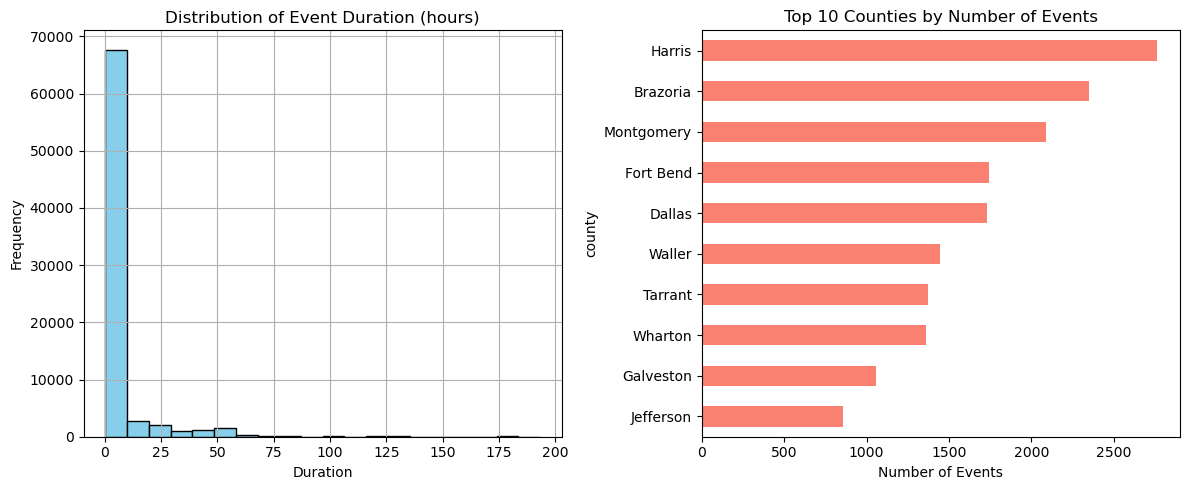

In [ ]:
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    print(f"\n=== 📂 Exploring: {file_name} ===")

    # --- Load file ---
    try:
        if file_name.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_name.endswith((".xlsx", ".xls")):
            df = pd.read_excel(file_path)
        elif file_name.endswith(".pkl") or file_name.endswith(".pickle"):
            df = pd.read_pickle(file_path)
        elif file_name.endswith(".json"):
            df = pd.read_json(file_path)
        else:
            print("⚠️ Unsupported format. Skipping.")
            continue
    except Exception as e:
        print(f"❌ Failed to load: {e}")
        continue

    # --- Validate structure ---
    required_cols = {'start_time', 'end_time', 'duration', 'Event Type', 'county',
                     'min_customers', 'max_customers', 'mean_customers'}
    if not required_cols.issubset(df.columns):
        print("⚠️ Required columns missing. Skipping this file.")
        continue

    # --- Parse dates ---
    try:
        df['start_time'] = pd.to_datetime(df['start_time'])
        df['end_time'] = pd.to_datetime(df['end_time'])
    except Exception as e:
        print(f"⚠️ Date parsing error: {e}")
        continue

    # --- Print info ---
    print("📌 Records:", len(df))
    print("🧾 Event Types:\n", df['Event Type'].value_counts().head())
    print("🕒 Time Range:", df['start_time'].min().date(), "to", df['end_time'].max().date())
    print("👥 Customer Impact:\n", df[['min_customers', 'max_customers', 'mean_customers']].describe())

    # --- Plotting ---
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    df['duration'].plot(kind='hist', bins=20, ax=axs[0], color='skyblue', edgecolor='black')
    axs[0].set_title('Duration Distribution')
    axs[0].set_xlabel('Hours')

    df['county'].value_counts().head(10).plot(kind='barh', ax=axs[1], color='salmon')
    axs[1].set_title('Top 10 Counties by Events')
    axs[1].invert_yaxis()

    fig.suptitle(f"Outage Stats for {file_name}", fontsize=12)
    plt.tight_layout()
    plt.show()

📁 Found 31 files

=== 📂 Exploring: eaglei_outages_2014_agg.csv ===
! Not enough matched columns. Skipping.

=== 📂 Exploring: eaglei_outages_2014_merged.csv ===
! Timestamp parsing failed. Skipping.

=== 📂 Exploring: eaglei_outages_2015_agg.csv ===
! Not enough matched columns. Skipping.

=== 📂 Exploring: eaglei_outages_2015_merged.csv ===
! Timestamp parsing failed. Skipping.

=== 📂 Exploring: eaglei_outages_2016_agg.csv ===
! Not enough matched columns. Skipping.

=== 📂 Exploring: eaglei_outages_2016_merged.csv ===
! Timestamp parsing failed. Skipping.

=== 📂 Exploring: eaglei_outages_2017_agg.csv ===
! Not enough matched columns. Skipping.

=== 📂 Exploring: eaglei_outages_2017_merged.csv ===
! Timestamp parsing failed. Skipping.

=== 📂 Exploring: eaglei_outages_2018_agg.csv ===
! Not enough matched columns. Skipping.

=== 📂 Exploring: eaglei_outages_2018_merged.csv ===
! Timestamp parsing failed. Skipping.

=== 📂 Exploring: eaglei_outages_2019_agg.csv ===
! Not enough matched columns

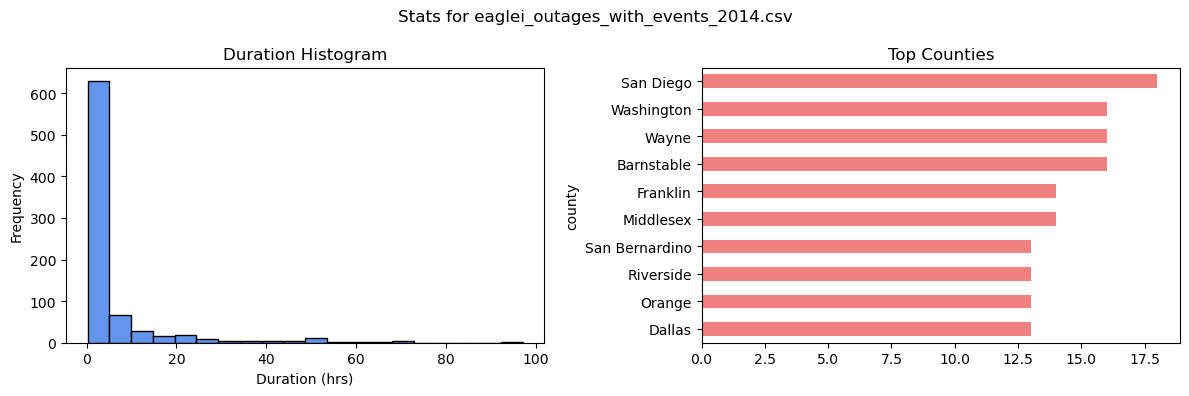


=== 📂 Exploring: eaglei_outages_with_events_2015.csv ===
Records: 12681
Event Types:
 event_type
Severe Weather             8400
Severe Weather - Winter    1794
System Operations          1290
Vandalism                   439
Other                       345
Name: count, dtype: int64
From 2015-01-07 to 2015-12-31
Customer Stats:
        min_customers  max_customers  mean_customers
count   12681.000000   12681.000000    12681.000000
mean     1664.201640    3555.422680     2336.237649
std      8481.953553   17544.963409    10688.016258
min       200.000000     200.000000      200.000000
25%       237.000000     336.000000      310.666667
50%       348.000000     721.000000      593.500000
75%       831.000000    1956.000000     1399.800000
max    122231.000000  251333.000000   167987.500000


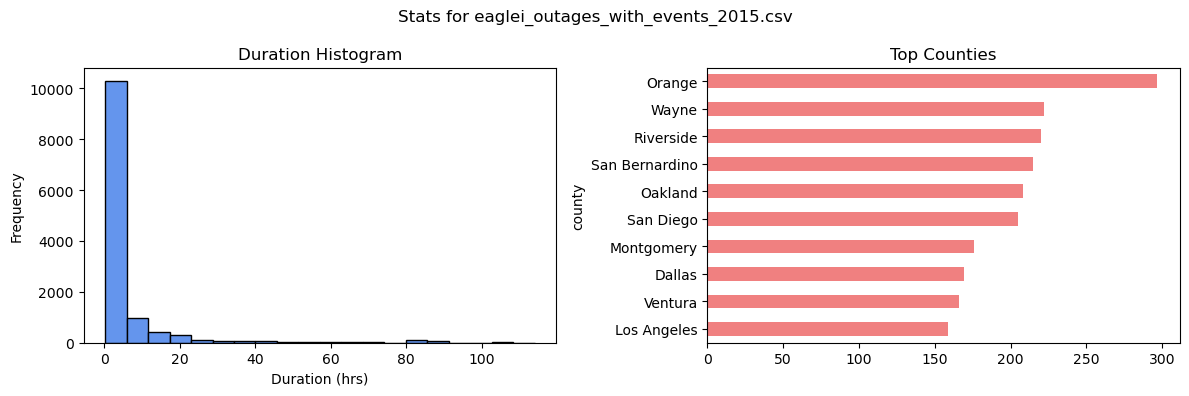


=== 📂 Exploring: eaglei_outages_with_events_2016.csv ===
Records: 22097
Event Types:
 event_type
Severe Weather            15298
Weather                    2832
Fuel Supply Deficiency     1319
Sabotage                    624
Vandalism                   548
Name: count, dtype: int64
From 2016-01-04 to 2016-12-31
Customer Stats:
        min_customers  max_customers  mean_customers
count   22097.000000   22097.000000    22097.000000
mean     1650.308141    3949.646785     2507.751865
std     18535.794978   26481.073629    19896.343413
min       200.000000     200.000000      200.000000
25%       216.000000     284.000000      261.833333
50%       276.000000     625.000000      499.200000
75%       609.000000    1938.000000     1229.354167
max    467041.000000  467041.000000   467041.000000


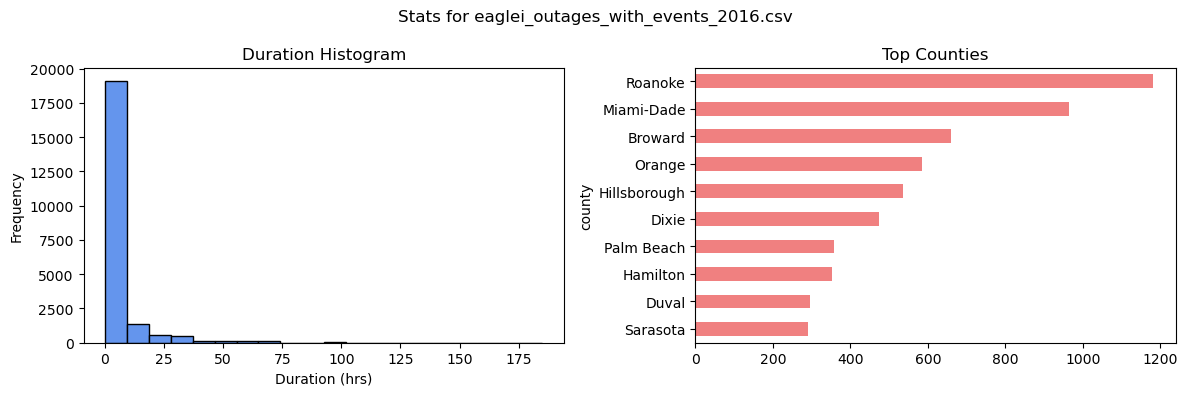


=== 📂 Exploring: eaglei_outages_with_events_2017.csv ===
Records: 23945
Event Types:
 event_type
Severe Weather                              21778
Vandalism                                     612
Severe Weather/Transmission Interruption      365
Fuel Supply Deficiency                        287
Transmission Interruption                     215
Name: count, dtype: int64
From 2017-01-05 to 2017-12-31
Customer Stats:
        min_customers  max_customers  mean_customers
count   23945.000000   2.394500e+04    2.394500e+04
mean    20747.702944   4.941867e+04    2.630163e+04
std     87007.442550   1.984777e+05    1.051352e+05
min       200.000000   2.000000e+02    2.000000e+02
25%       230.000000   2.990000e+02    2.790000e+02
50%       325.000000   7.340000e+02    5.837647e+02
75%       960.000000   2.719000e+03    1.723000e+03
max    808450.000000   1.777800e+06    1.078687e+06


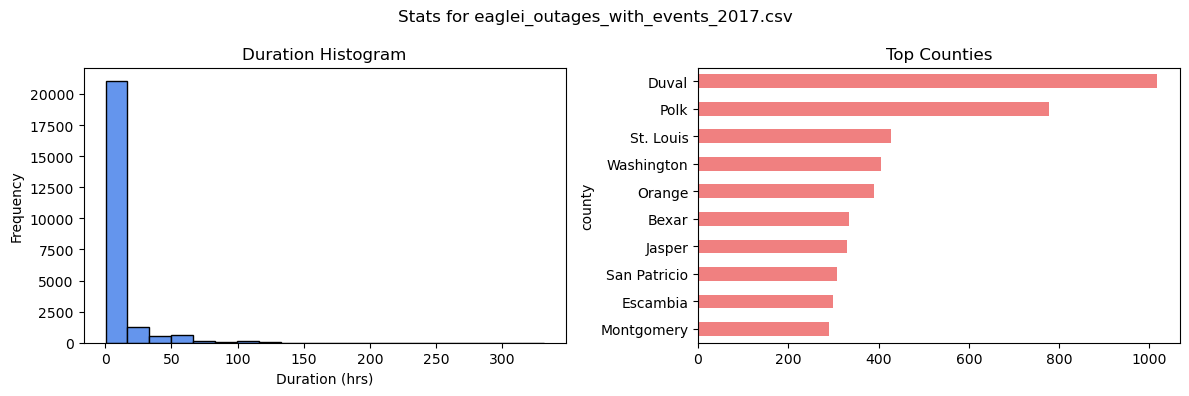


=== 📂 Exploring: eaglei_outages_with_events_2018.csv ===
Records: 36563
Event Types:
 event_type
Severe Weather            26735
System Operations          2769
Vandalism                  2623
Fuel Supply Deficiency     1009
Suspicious Activity         875
Name: count, dtype: int64
From 2018-01-01 to 2018-12-31
Customer Stats:
        min_customers  max_customers  mean_customers
count   36563.000000   36563.000000    36563.000000
mean     1266.635396    2361.753166     1700.237762
std      4212.677351    5929.861291     4585.551451
min       200.000000     200.000000      200.000000
25%       228.000000     317.000000      293.000000
50%       315.000000     700.000000      562.000000
75%       729.000000    1910.000000     1279.000000
max    165222.000000  170309.000000   165222.000000


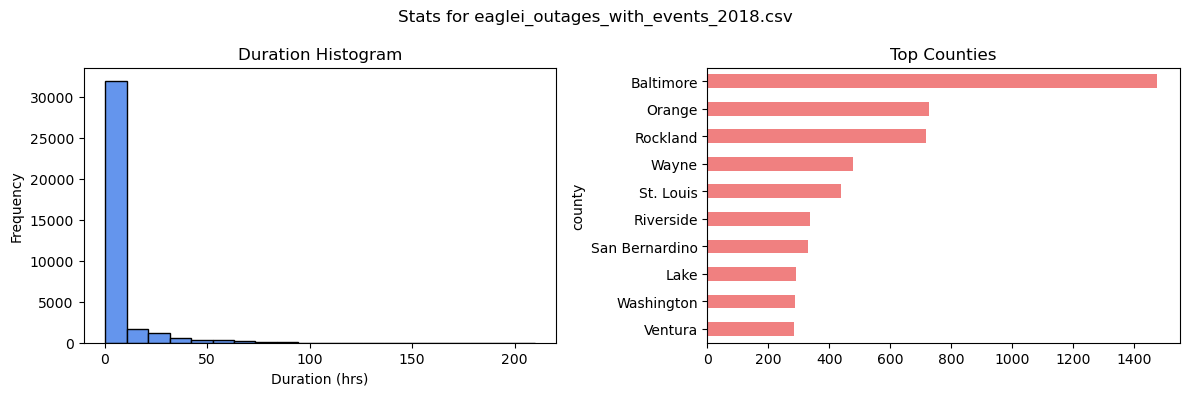


=== 📂 Exploring: eaglei_outages_with_events_2019.csv ===
Records: 53570
Event Types:
 event_type
Severe Weather                              35824
Severe Weather/Transmission Interruption     5209
Vandalism                                    3259
Severe Weather/Distribution Interruption     2836
System Operations                            2553
Name: count, dtype: int64
From 2019-01-05 to 2019-12-27
Customer Stats:
        min_customers  max_customers  mean_customers
count   53570.000000   53570.000000    53570.000000
mean     1381.541572    2516.247527     1836.183836
std      5945.854512    8498.105102     6648.252655
min       200.000000     200.000000      200.000000
25%       225.000000     299.000000      281.000000
50%       303.000000     600.000000      496.653846
75%       616.000000    1582.000000     1071.000000
max    122875.000000  313327.000000   122875.000000


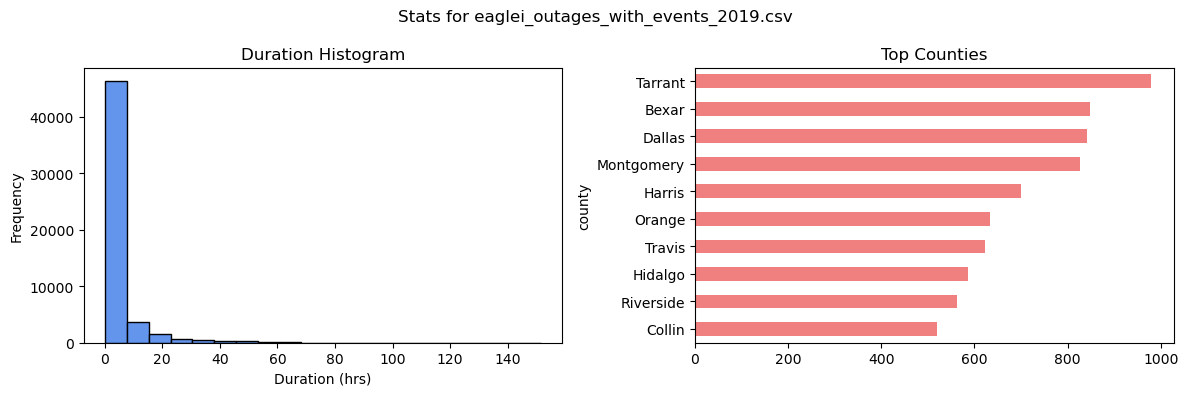


=== 📂 Exploring: eaglei_outages_with_events_2020.csv ===
Records: 84875
Event Types:
 event_type
Severe Weather               65766
System Operations             8374
Transmission Interruption     2860
Suspicious Activity           2118
Vandalism                     1721
Name: count, dtype: int64
From 2020-01-09 to 2020-12-30
Customer Stats:
        min_customers  max_customers  mean_customers
count   84875.000000   84875.000000    84875.000000
mean     1644.043570    3015.368554     2185.878141
std      6989.655303   10303.147661     8158.557822
min       200.000000     200.000000      200.000000
25%       230.000000     306.000000      285.000000
50%       326.000000     641.000000      526.692308
75%       736.000000    1820.000000     1255.200000
max    166685.000000  279858.000000   195302.094340


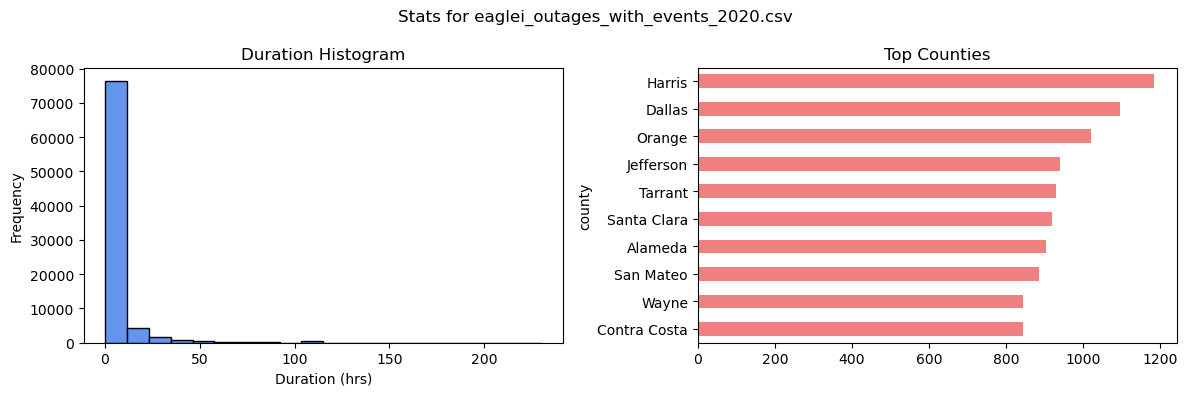


=== 📂 Exploring: eaglei_outages_with_events_2021.csv ===
Records: 119435
Event Types:
 event_type
Severe Weather            97799
System Operations          6367
Vandalism                  3358
Fuel Supply Deficiency     2817
Suspicious Activity        2403
Name: count, dtype: int64
From 2021-01-01 to 2021-12-31
Customer Stats:
        min_customers  max_customers  mean_customers
count  119435.000000  119435.000000   119435.000000
mean     2918.106627    5190.420061     3915.878172
std     17912.552581   24301.459757    19919.658754
min       200.000000     200.000000      200.000000
25%       232.000000     352.000000      316.400000
50%       350.000000     768.000000      612.000000
75%       717.000000    2134.000000     1384.663717
max    261213.000000  455986.000000   299223.159236


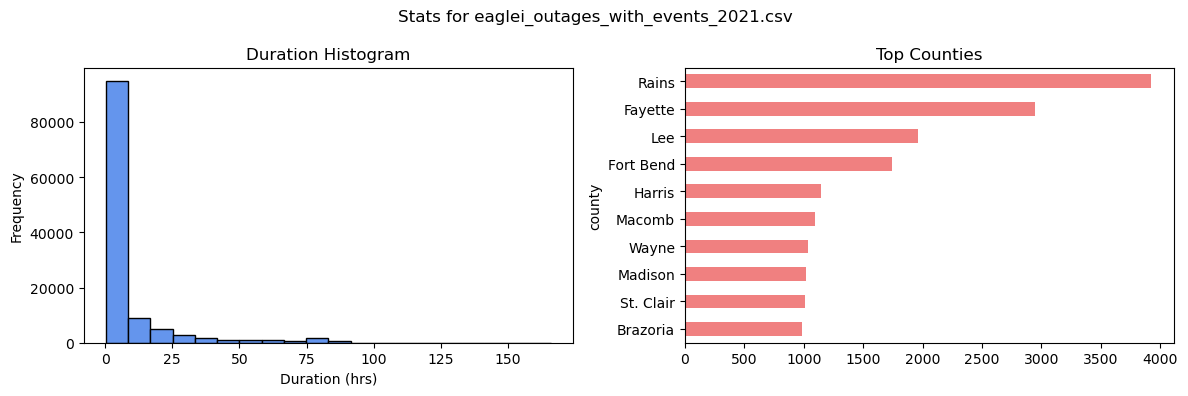


=== 📂 Exploring: eaglei_outages_with_events_2022.csv ===
Records: 94853
Event Types:
 event_type
Severe Weather               66206
System Operations             9660
Vandalism                     6927
Suspicious Activity           4063
Transmission Interruption     2662
Name: count, dtype: int64
From 2022-01-01 to 2023-01-01
Customer Stats:
        min_customers  max_customers  mean_customers
count   94853.000000   94853.000000    94853.000000
mean     1421.627729    3113.575817     2051.293089
std      9555.277334   15060.179302    10772.029344
min       200.000000     200.000000      200.000000
25%       225.000000     303.000000      279.800000
50%       296.000000     600.000000      490.200000
75%       579.000000    1579.000000     1085.500000
max    225347.000000  245938.000000   229238.722222


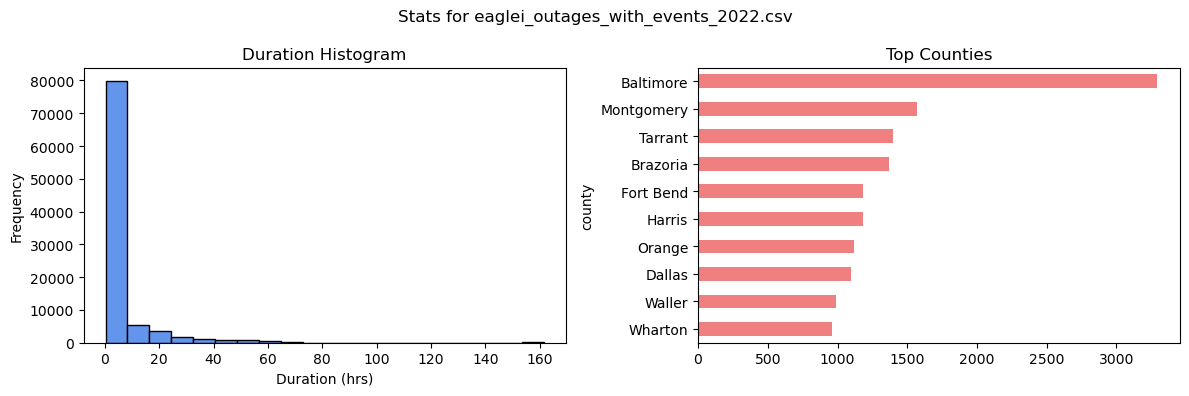


=== 📂 Exploring: eaglei_outages_with_events_2023.csv ===
Records: 77341
Event Types:
 event_type
Severe Weather                   52293
- Weather or natural disaster     8534
Vandalism                         3383
Suspicious Activity               2541
System Operations                 1534
Name: count, dtype: int64
From 2023-01-01 to 2023-12-02
Customer Stats:
        min_customers  max_customers  mean_customers
count   77341.000000   77341.000000    77341.000000
mean      531.494537    1653.961573      913.385911
std      1111.925597    6589.015188     2547.766271
min       200.000000     200.000000      200.000000
25%       220.000000     285.000000      267.200000
50%       278.000000     513.000000      430.000000
75%       474.000000    1291.000000      863.100000
max     60581.000000  348829.000000   289849.333333


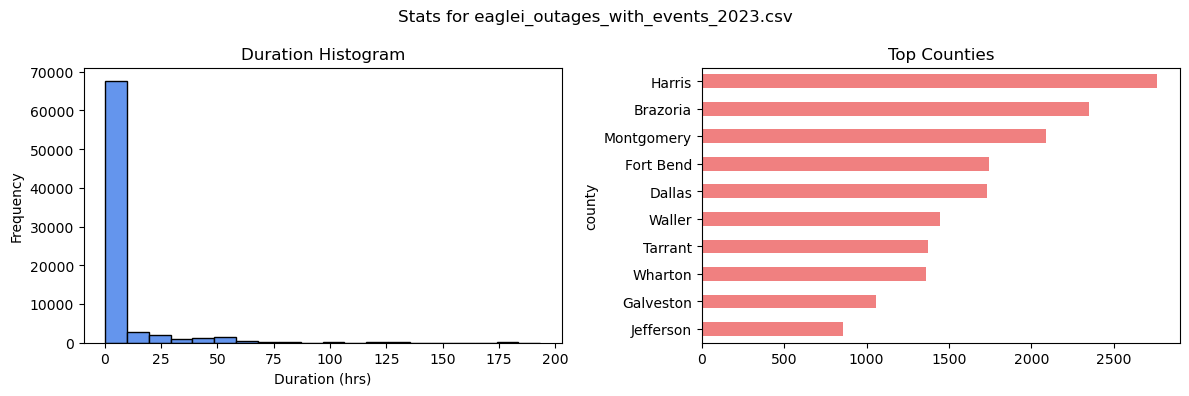


=== 📂 Exploring: Readme_Disclaimer.docx ===
⚠️ Unsupported format. Skipping.

📊 === Summary Report ===

🗂️ eaglei_outages_2014_agg.csv — ❌ Skipped
   Used Columns: []
   Unused Columns: ['customer_weighted_hours', 'max_outage_duration', 'month', 'outage_count', 'state', 'year']

🗂️ eaglei_outages_2014_merged.csv — ❌ Skipped
   Used Columns: ['county', 'duration', 'max_customers', 'mean_customers', 'min_customers', 'start_time']
   Unused Columns: ['fips', 'state']

🗂️ eaglei_outages_2015_agg.csv — ❌ Skipped
   Used Columns: []
   Unused Columns: ['customer_weighted_hours', 'max_outage_duration', 'month', 'outage_count', 'state', 'year']

🗂️ eaglei_outages_2015_merged.csv — ❌ Skipped
   Used Columns: ['county', 'duration', 'max_customers', 'mean_customers', 'min_customers', 'start_time']
   Unused Columns: ['fips', 'state']

🗂️ eaglei_outages_2016_agg.csv — ❌ Skipped
   Used Columns: []
   Unused Columns: ['customer_weighted_hours', 'max_outage_duration', 'month', 'outage_count', 'stat

In [12]:
# Canonical roles we're trying to find
target_roles = {
    'start_time', 'end_time', 'duration', 'event_type',
    'county', 'min_customers', 'max_customers', 'mean_customers'
}

min_matched_columns = 5  # minimum to continue analysis

print(f"📁 Found {len(files)} files")

# Track files and unused columns
summary_report = []

# --- File Loop ---
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    print(f"\n=== 📂 Exploring: {file_name} ===")

    # Load file
    try:
        if file_name.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_name.endswith((".xlsx", ".xls")):
            df = pd.read_excel(file_path)
        elif file_name.endswith((".pkl", ".pickle")):
            df = pd.read_pickle(file_path)
        elif file_name.endswith(".json"):
            df = pd.read_json(file_path)
        else:
            print("⚠️ Unsupported format. Skipping.")
            continue
    except Exception as e:
        print(f"❌ Failed to load: {e}")
        continue

    # Normalize column names
    original_cols = df.columns.tolist()
    norm_cols = [col.lower().strip().replace(" ", "_") for col in original_cols]
    df.columns = norm_cols

    # Fuzzy match to canonical roles
    col_map = {}
    used_cols = set()
    for role in target_roles:
        match = difflib.get_close_matches(role, norm_cols, n=1, cutoff=0.7)
        if match:
            col_map[role] = match[0]
            used_cols.add(match[0])
        else:
            col_map[role] = None

    unused_cols = set(norm_cols) - used_cols
    matched = sum(v is not None for v in col_map.values())

    if matched < min_matched_columns:
        print("! Not enough matched columns. Skipping.")
        summary_report.append((file_name, used_cols, unused_cols, False))
        continue

    # Rename matched columns to canonical
    for role, col in col_map.items():
        if col:
            df[role] = df[col]

    # Try parsing dates
    try:
        df['start_time'] = pd.to_datetime(df['start_time'])
        df['end_time'] = pd.to_datetime(df['end_time'])
    except:
        print("! Timestamp parsing failed. Skipping.")
        summary_report.append((file_name, used_cols, unused_cols, False))
        continue

    # Show summary
    print("Records:", len(df))
    print("Event Types:\n", df['event_type'].value_counts().head())
    print("From", df['start_time'].min().date(), "to", df['end_time'].max().date())
    print("Customer Stats:\n", df[['min_customers', 'max_customers', 'mean_customers']].describe())

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    df['duration'].plot(kind='hist', bins=20, ax=axs[0], color='cornflowerblue', edgecolor='black')
    axs[0].set_title("Duration Histogram")
    axs[0].set_xlabel("Duration (hrs)")

    df['county'].value_counts().head(10).plot(kind='barh', ax=axs[1], color='lightcoral')
    axs[1].set_title("Top Counties")
    axs[1].invert_yaxis()

    plt.suptitle(f"Stats for {file_name}", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Add to report
    summary_report.append((file_name, used_cols, unused_cols, True))

# --- Final Summary ---
print("\n📊 === Summary Report ===")
for name, used, unused, success in summary_report:
    print(f"\n🗂️ {name} — {'✅ Used' if success else '❌ Skipped'}")
    print("   Used Columns:", sorted(used))
    print("   Unused Columns:", sorted(unused))

In [27]:
target_roles = {
    'start_time', 'end_time', 'duration', 'event_type',
    'county', 'min_customers', 'max_customers', 'mean_customers'
}
min_matched_columns = 1

master_df = []
summary_report = []

def fuzzy_match_columns(df):
    norm_cols = [c.lower().strip().replace(" ", "_") for c in df.columns]
    df.columns = norm_cols
    col_map = {}
    used = set()

    for role in target_roles:
        match = difflib.get_close_matches(role, norm_cols, n=1, cutoff=0.7)
        if match:
            col_map[role] = match[0]
            used.add(match[0])
        else:
            col_map[role] = None

    return col_map, used, set(norm_cols) - used

In [28]:
def analyze_outage_data(df, file_name):
    print("Records:", len(df))

    # Event types
    if 'event_type' in df.columns:
        print(" Event Types:\n", df['event_type'].value_counts().head())
    else:
        print(" 'event_type' column missing — skipping type stats.")

    # Time range
    if 'start_time' in df.columns and 'end_time' in df.columns:
        print(" From", df['start_time'].min().date(), "to", df['end_time'].max().date())
    else:
        print(" Missing start/end time columns.")

    # Customer stats
    customer_cols = ['min_customers', 'max_customers', 'mean_customers']
    available_stats = [col for col in customer_cols if col in df.columns]
    if available_stats:
        print(" Customer Stats:\n", df[available_stats].describe())
    else:
        print(" No customer impact columns found.")

    # Plotting
    # fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # if 'duration' in df.columns:
    #     df['duration'].plot(kind='hist', bins=20, ax=axs[0], color='cornflowerblue', edgecolor='black')
    #     axs[0].set_title("Duration Histogram")
    #     axs[0].set_xlabel("Hours")
    # else:
    #     axs[0].set_title("No duration data")

    # if 'county' in df.columns:
    #     df['county'].value_counts().head(10).plot(kind='barh', ax=axs[1], color='lightcoral')
    #     axs[1].set_title("Top Counties")
    #     axs[1].invert_yaxis()
    # else:
    #     axs[1].set_title("No county data")

    # plt.suptitle(f"Stats for {file_name}")
    # plt.tight_layout()
    # plt.show()


=== 📂 Exploring: eaglei_outages_2014_agg.csv ===
📊 Aggregated outage summary detected.
     state  year  month  outage_count  max_outage_duration  \
0  Alabama  2014      0            33                 26.5   
1  Alabama  2014      1             0                  0.0   
2  Alabama  2014      2             0                  0.0   
3  Alabama  2014      3             0                  0.0   
4  Alabama  2014      4             0                  0.0   

   customer_weighted_hours  
0                 51208.25  
1                     0.00  
2                     0.00  
3                     0.00  
4                     0.00  
⚡ Avg. Customer-Weighted Hours per Year:
year
2014    181844.278428
Name: customer_weighted_hours, dtype: float64

=== 📂 Exploring: eaglei_outages_2014_merged.csv ===
Estimated 'end_time' from start + duration
Records: 13516
 'event_type' column missing — skipping type stats.
 From 2014-11-01 to 2014-12-31
 Customer Stats:
        min_customers  max_customers  me

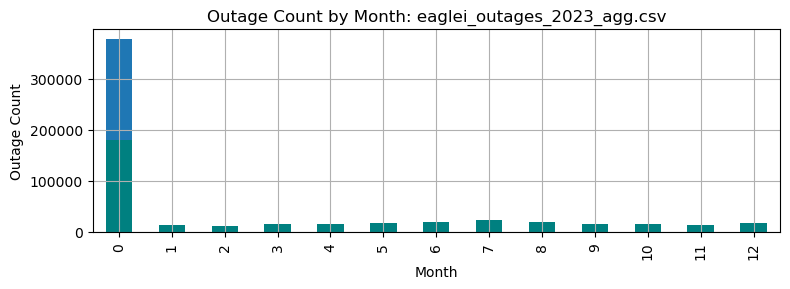

In [31]:
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    print(f"\n=== 📂 Exploring: {file_name} ===")

    # Skip non-data
    if not file_name.endswith((".csv", ".xlsx", ".xls", ".pkl", ".json")):
        print("! Skipping unsupported format.")
        continue

    # Load
    try:
        if file_name.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_name.endswith((".xlsx", ".xls")):
            df = pd.read_excel(file_path)
        elif file_name.endswith(".pkl"):
            df = pd.read_pickle(file_path)
        elif file_name.endswith(".json"):
            df = pd.read_json(file_path)
    except Exception as e:
        print(f"❌ Failed to load: {e}")
        continue

    # Fuzzy match columns
    col_map, used_cols, unused_cols = fuzzy_match_columns(df)

    if "agg" in file_name.lower():
        print("📊 Aggregated outage summary detected.")

        # Normalize again in case it's a weird one
        df.columns = [col.lower().strip().replace(" ", "_") for col in df.columns]

        # Show key stats
        print(df.head())

        # Plot if columns exist
        if 'year' in df.columns and 'outage_count' in df.columns:
            df.groupby('year')['outage_count'].sum().plot(
                kind='bar', figsize=(8, 4), title=f"Outage Count by Year: {file_name}"
            )
            plt.xlabel("Year")
            plt.ylabel("Outage Count")
            plt.grid(True)
            plt.tight_layout()
            # plt.show()

        if 'month' in df.columns and 'outage_count' in df.columns:
            df.groupby('month')['outage_count'].sum().plot(
                kind='bar', figsize=(8, 3), title=f"Outage Count by Month: {file_name}", color='teal'
            )
            plt.xlabel("Month")
            plt.ylabel("Outage Count")
            plt.grid(True)
            plt.tight_layout()
            # plt.show()

        if 'customer_weighted_hours' in df.columns:
            print("⚡ Avg. Customer-Weighted Hours per Year:")
            print(df.groupby('year')['customer_weighted_hours'].mean())

        summary_report.append((file_name, set(df.columns), set(), True))
        continue  # Skip to next file after handling agg


    # Rename usable columns
    for role, col in col_map.items():
        if col:
            df[role] = df[col]

    # Try to fill missing 'end_time'
    if col_map['end_time'] is None and col_map['start_time'] and col_map['duration']:
        try:
            df['end_time'] = pd.to_datetime(df['start_time']) + pd.to_timedelta(df['duration'], unit='h')
            col_map['end_time'] = 'end_time'
            print("Estimated 'end_time' from start + duration")
        except Exception as e:
            print("! Could not estimate end_time:", e)

    # Required to analyze
    must_have = {'start_time', 'end_time', 'duration'}
    if not must_have.issubset(set(col_map.keys())) or any(col_map[k] is None for k in must_have):
        print("! Insufficient time info. Skipping.")
        summary_report.append((file_name, used_cols, unused_cols, False))
        continue

    try:
        df['start_time'] = pd.to_datetime(df['start_time'])
        df['end_time'] = pd.to_datetime(df['end_time'])
    except:
        print("! Timestamp parsing failed. Skipping.")
        summary_report.append((file_name, used_cols, unused_cols, False))
        continue

    if "agg" in file_name.lower():
        print("Aggregated file detected — plotting summary...")
        df['year'] = df.get('year') or df['start_time'].dt.year
        if 'outage_count' in df.columns:
            df.groupby('year')['outage_count'].sum().plot(kind='bar', title="Outages per Year (Aggregated)", figsize=(6, 3))
            # plt.show()
        summary_report.append((file_name, used_cols, unused_cols, True))
        continue

    analyze_outage_data(df, file_name)
    master_df.append(df)
    summary_report.append((file_name, used_cols, unused_cols, True))


Combined master dataset shape: (3823108, 14)


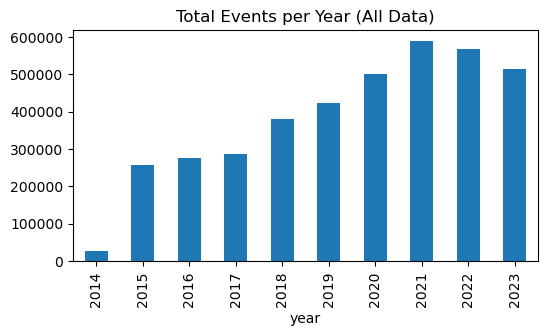

Saved summary report to outage_summary_report.csv


In [32]:
# Combine all detailed records
if master_df:
    full_df = pd.concat(master_df, ignore_index=True)
    print(f"\nCombined master dataset shape: {full_df.shape}")

    # Optional: Save or plot from full_df
    full_df['year'] = full_df['start_time'].dt.year
    full_df.groupby('year').size().plot(kind='bar', title='Total Events per Year (All Data)', figsize=(6, 3))
    plt.show()

# Summary report to DataFrame
summary_df = pd.DataFrame(summary_report, columns=['file_name', 'used_columns', 'unused_columns', 'loaded_successfully'])
summary_df.to_csv("outage_summary_report.csv", index=False)
print("Saved summary report to outage_summary_report.csv")

In [49]:
# Make sure FIPS is properly formatted
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)


county_summary = full_df.groupby('fips').agg(
    outage_count=('duration', 'count'),
    total_duration=('duration', 'sum'),     # <--- added
    avg_duration=('duration', 'mean'),
    total_customers=('mean_customers', 'sum'),
    avg_customers=('mean_customers', 'mean'),
).reset_index()

county_summary['fips'] = county_summary['fips'].astype(str)


In [50]:

fig = px.choropleth_mapbox(
    county_summary,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations='fips',
    color='total_duration',  # fixed!
    color_continuous_scale="YlOrRd",
    range_color=(0, county_summary['total_duration'].quantile(0.95)),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.8, "lon": -96},
    opacity=0.6,
    labels={'total_duration': 'Total Duration (hrs)'}
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, title="Total Outage Duration by County")
fig.show()

In [51]:
# Set your Mapbox token
px.set_mapbox_access_token("your-mapbox-access-token-here")

fig = px.choropleth_mapbox(
    county_summary,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations='fips',
    color='outage_count',
    color_continuous_scale="YlGnBu",
    range_color=(0, county_summary['outage_count'].quantile(0.95)),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.8, "lon": -96},
    opacity=0.65,
    labels={'outage_count': "Outage Events"},
    hover_name='fips',
    hover_data={
        "outage_count": True,
        "avg_duration": ":.2f",
        "total_customers": ":,.0f",
        "avg_customers": ":,.0f",
        "fips": False
    }
)

fig.update_layout(
    title="🗺️ U.S. County Outage Events (All Years)",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [65]:
extreme_keywords = [
    "Severe Weather", "Winter Storm", "Wind", "Hurricane", "Tornado", 
    "Flood", "Storm", "Snow", "Ice", "Natural Disaster", 
    "Extreme Cold", "Extreme Heat", "Drought", "Fire", "Fuel supply emergency",
    "Weather", "Fuel Supply Deficiency"
]

# Filter rows where 'event_type' contains any of the keywords
pattern = '|'.join(extreme_keywords)
extreme_df = full_df[full_df['event_type'].str.contains(pattern, case=False, na=False)]

In [66]:
# Set your Mapbox token
px.set_mapbox_access_token("your-mapbox-access-token-here")

fig = px.choropleth_mapbox(
    county_summary,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations='fips',
    color='outage_count',
    color_continuous_scale="YlGnBu",
    range_color=(0, county_summary['outage_count'].quantile(0.95)),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.8, "lon": -96},
    opacity=0.65,
    labels={'outage_count': "Outage Events"},
    hover_name='fips',
    hover_data={
        "outage_count": True,
        "avg_duration": ":.2f",
        "total_customers": ":,.0f",
        "avg_customers": ":,.0f",
        "fips": False
    }
)

fig.update_layout(
    title="🗺️ U.S. County Outage Events (All Years)",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [67]:
extreme_df['event_type'].value_counts()

extreme_by_county = extreme_df.groupby('fips').agg({
    'duration': 'sum',
    'event_type': 'count',
    'mean_customers': 'mean'
}).rename(columns={'event_type': 'event_count'}).reset_index()

In [68]:

# Get sets of event types
all_event_types = set(full_df['event_type'].dropna().unique())
extreme_event_types = set(extreme_df['event_type'].unique())
non_extreme_event_types = sorted(list(all_event_types - extreme_event_types))

# Print summary
print("❌ Event types not classified as extreme:")
for t in non_extreme_event_types:
    print("  -", t)

print(f"\n✅ Total number of extreme events: {len(extreme_df)}")

print("\n📊 Breakdown of extreme events:")
print(extreme_df['event_type'].value_counts())

❌ Event types not classified as extreme:
  -  Vandalism
  - - Failure at high voltage substation or switchyard
  - - Failure at high voltage substation or switchyard - Other
  - - Other
  - - Physical attack
  - - Physical attack - Generator loss or failure
  - - Physical attack - Other
  - - Physical attack - Vandalism - Suspicious activity
  - - Physical attack - Vandalism - Theft - Suspicious activity
  - - Physical attack - Vandalism
  - - Physical attack - Vandalism - Other
  - - Physical attack - Vandalism - Suspicious activity
  - - Suspicious activity
  - - Theft
  - - Theft - Other
  - - Theft - Suspicious activity
  - - Threat of physical attack
  - - Transmission equipment failure
  - - Unknown
  - - Unknown - Vandalism
  - - Unknown - Failure at high voltage substation or switchyard
  - - Vandalism
  - - Vandalism - Suspicious activity
  - - Vandalism - Theft
  - - Vandalism - Theft - Suspicious activity
  - - Vandalism - Theft
  - Actual Physical Attack
  - Actual Physical